In [45]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import mean_squared_error

In [46]:
elettricity_data = pd.read_csv("citylearn_challenge_2023_phase_1/Building_1.csv")
carbon_data = pd.read_csv("citylearn_challenge_2023_phase_1/carbon_intensity.csv")

In [47]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_x.fit_transform(elettricity_data)
y_scaled = scaler_y.fit_transform(carbon_data)

In [48]:
def create_sequence (X,y,time_steps):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i + time_steps])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

In [49]:
time_steps = 24

In [50]:
X_sequences, y_sequences = create_sequence(X_scaled, y_scaled, time_steps)

In [51]:
seed = 7
np.random.seed(seed)

X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences, test_size=0.25, random_state=seed)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=seed)

In [52]:
model = Sequential()

model.add(SimpleRNN(50, activation='relu', input_shape=(time_steps, X_train.shape[2])))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=[metrics.mae])
model.summary()

c:\Users\Simone\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)        │ (None, 50)             │         3,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,351 (13.09 KB)

 Trainable params: 3,351 (13.09 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.1129 - mean_absolute_error: 0.2719 - val_loss: 0.0630 - val_mean_absolute_error: 0.2117
Epoch 2/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0659 - mean_absolute_error: 0.2164 - val_loss: 0.0422 - val_mean_absolute_error: 0.1737
Epoch 3/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0462 - mean_absolute_error: 0.1677 - val_loss: 0.0374 - val_mean_absolute_error: 0.1625
Epoch 4/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0434 - mean_absolute_error: 0.1714 - val_loss: 0.0334 - val_mean_absolute_error: 0.1537
Epoch 5/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0326 - mean_absolute_error: 0.1452 - val_loss: 0.0290 - val_mean_absolute_error: 0.1411
Epoch 6/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0300 - mean_absolute_error: 0.1390 - val_loss: 0.0290 - val_mean_absolute_error: 0.1410
Epoch 7/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0305 - mean_absolute_error: 0.1471 - val_lo

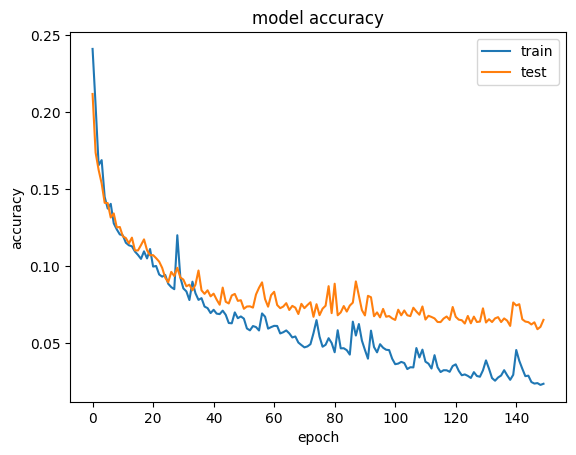

In [54]:
# Summarize history for accuracy
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [55]:
def RMSE(real, pred):
    return sqrt(mean_squared_error(real, pred))

def NRMSE(real, pred):
    return sqrt(mean_squared_error(real, pred)/(real.max() - real.min()))

In [56]:
pred = model.predict(X_test).reshape(1,-1)[0]

rmse = RMSE(y_test, pred)
nrmse = NRMSE(y_test, pred)


print("rmse : ",rmse,"  nrmse : ",nrmse)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
rmse :  0.08687490467107825   nrmse :  0.08994989636877732


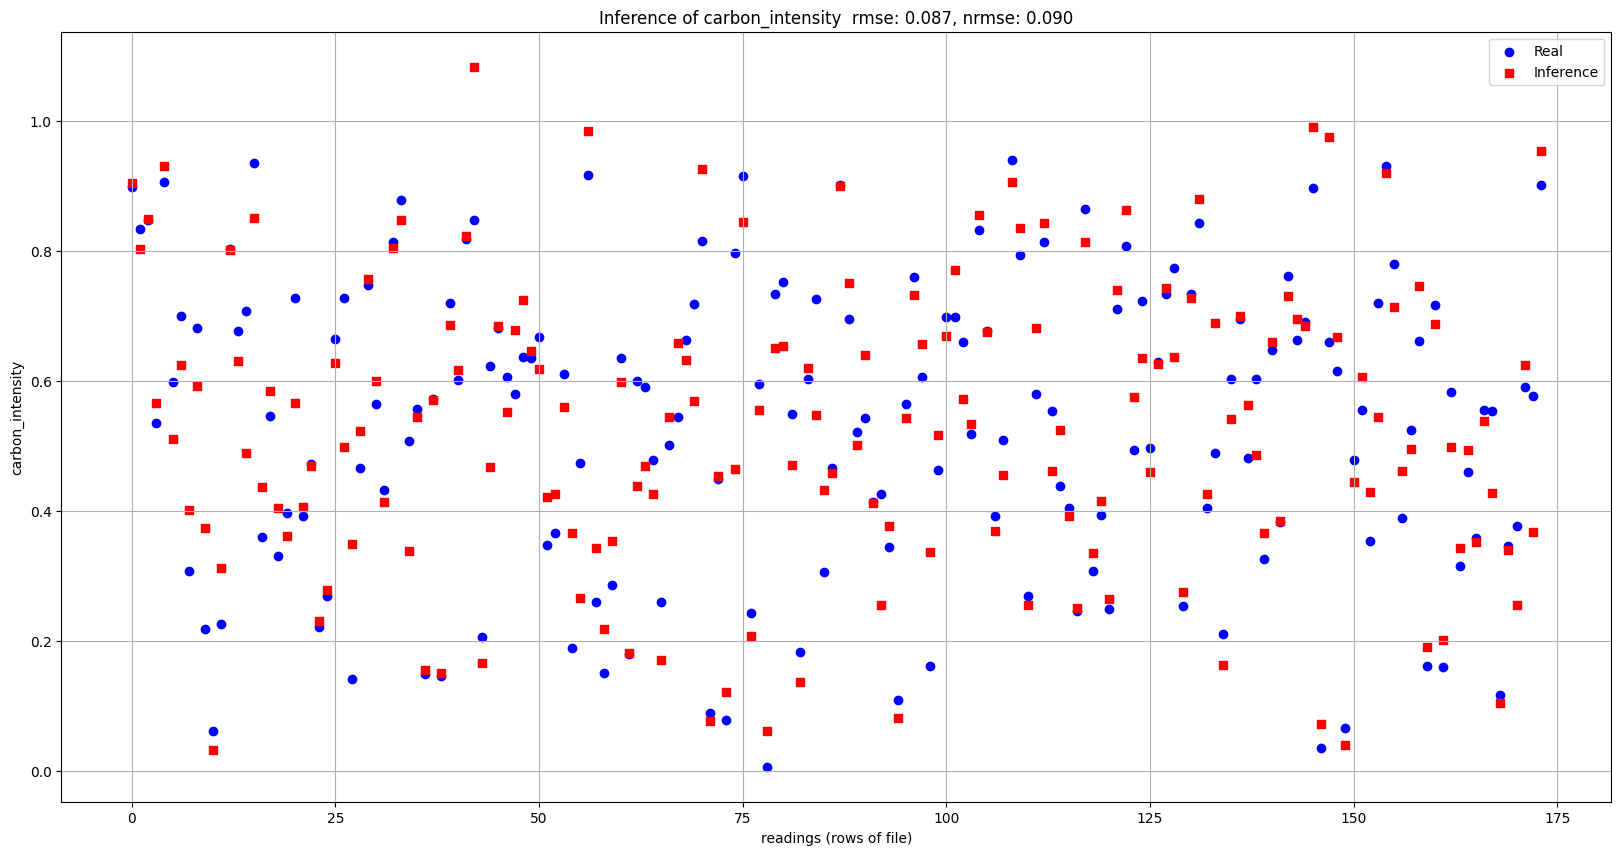

In [57]:
my_x=np.arange(0,len(X_test[:,0]),1)

fig = plt.figure(figsize=(20,10))
plt.scatter(my_x, y_test, label='Real', color='blue', marker='o')
plt.scatter(my_x, pred, label='Inference', color='red', marker='s')
plt.title(f'Inference of carbon_intensity  rmse: {rmse:.3f}, nrmse: {nrmse:.3f}')
plt.ylabel('carbon_intensity')
plt.xlabel('readings (rows of file)')
plt.grid()
plt.legend()
plt.show()

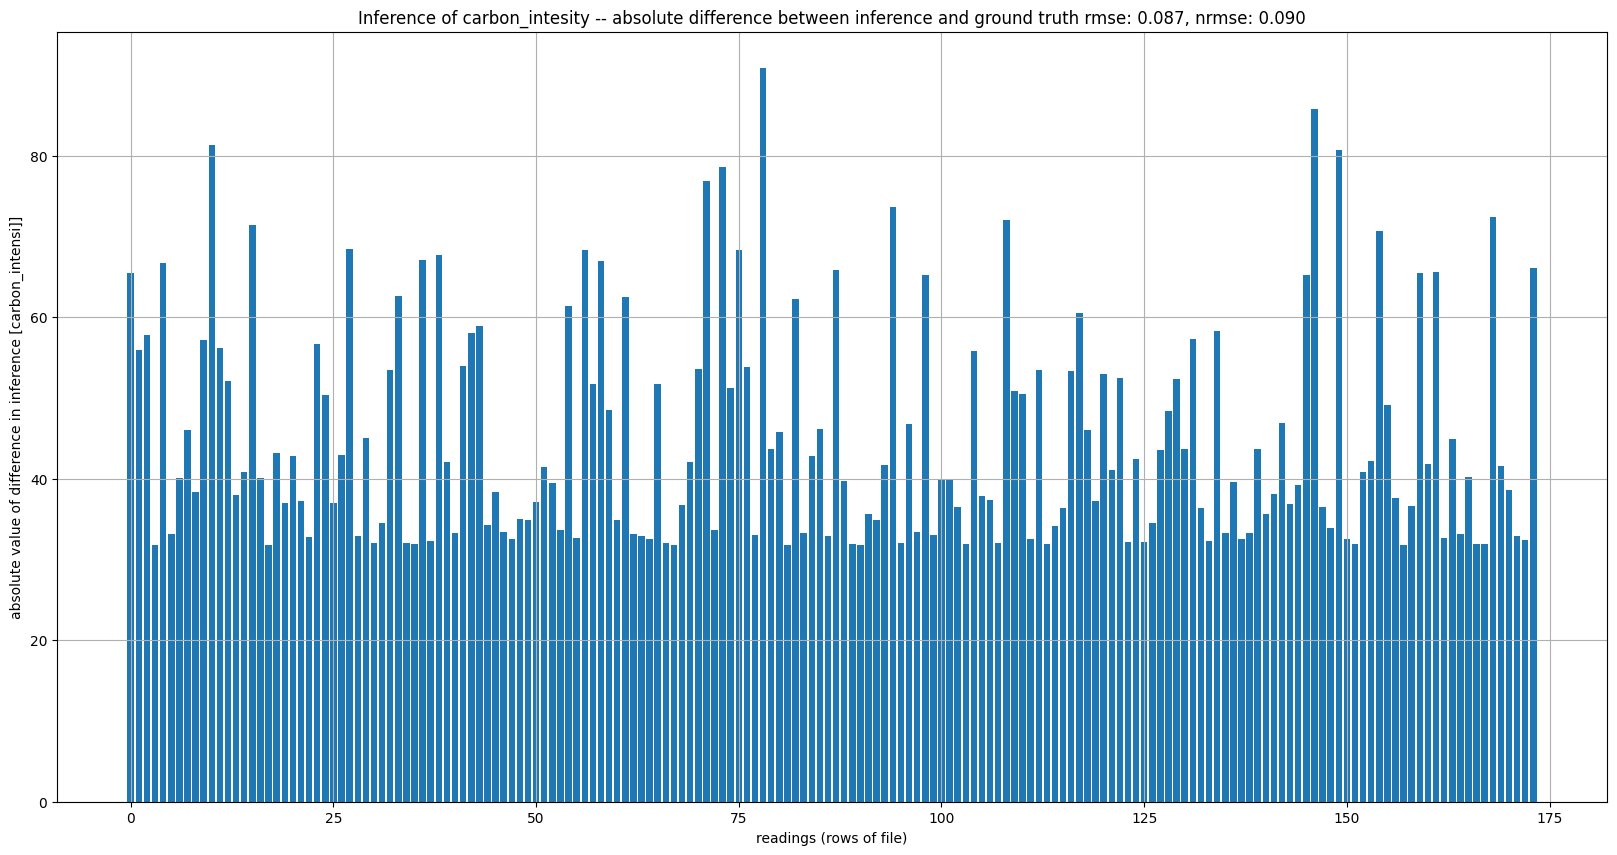

In [67]:
fig = plt.figure(figsize=(20,10))
my_d = abs(y_test-pred)
my_d = np.sum(my_d, axis=1)

plt.bar(my_x,my_d)
plt.title(f'Inference of carbon_intesity -- absolute difference between inference and ground truth rmse: {rmse:.3f}, nrmse: {nrmse:.3f}')
plt.ylabel(f'absolute value of difference in inference [carbon_intensi]]')
plt.xlabel('readings (rows of file)')
plt.grid()
plt.show()